In [6]:
from data_generator import ssp_data
import pickle
import matplotlib.pyplot as plt

In [9]:
ssp_obj = ssp_data()

Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_001.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_002.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_003.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_004.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_005.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_006.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_007.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_008.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_009.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_010.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_011.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_012.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_013.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_014.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_015.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_016.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_017.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_018.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_10932\799398034.py:40: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


KeyboardInterrupt: 

In [23]:
ssp_obj.to_pickle()

In [7]:
file = open('data_pickle', 'rb')
ssp_obj = pickle.load(file)
file.close()

In [8]:
ssp_obj.x

,time,lat,lon,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,...,tas_30,tas_31,tas_32,tas_33,tas_34,tas_35,tas_36,tas_37,tas_38,tas_39
0,1961-01-16 12:00:00,-43.125,288.750,286.400269,280.862762,286.771332,285.407745,283.856293,284.691101,284.222473,...,282.111908,282.265228,281.129608,286.833252,285.880707,284.140472,284.725891,284.140472,285.263153,284.725891
1,1961-02-15 00:00:00,-43.125,288.750,285.905518,281.284271,281.414459,284.798828,283.674713,284.747620,284.870758,...,281.504333,282.548706,281.564545,286.903931,284.964691,286.738007,283.592102,286.738007,286.132538,283.592102
2,1961-03-16 12:00:00,-43.125,288.750,284.728638,283.605560,281.929413,282.059021,281.492584,282.372467,282.833374,...,279.986084,280.477509,280.007172,284.080078,285.290619,281.925079,281.761536,281.925079,287.348694,281.761536
3,1961-04-16 00:00:00,-43.125,288.750,280.983887,276.310425,279.923767,279.065002,278.729950,278.684601,278.864471,...,276.463318,277.716187,277.234680,280.085754,280.959534,280.333771,279.282410,280.333771,288.668671,279.282410
4,1961-05-16 12:00:00,-43.125,288.750,279.186432,272.765076,278.642639,275.679047,275.733490,275.873016,275.867615,...,274.361664,275.168488,276.429657,277.081879,278.714783,278.002899,275.879089,278.002899,289.741669,275.879089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148195,1979-08-16 12:00:00,-13.125,335.625,294.739410,295.901398,297.703033,296.290222,296.006287,296.114349,296.208649,...,297.537598,295.884766,296.006897,296.684509,295.838593,294.373749,295.813171,294.373749,296.948700,295.813171
148196,1979-09-16 00:00:00,-13.125,335.625,294.692566,295.707916,297.600006,296.493225,295.870270,295.974457,296.031311,...,297.362488,295.818451,295.926453,296.765686,295.840881,294.300812,295.637085,294.300812,297.087402,295.637085
148197,1979-10-16 12:00:00,-13.125,335.625,295.054901,296.138306,297.874847,296.958801,296.478088,296.565735,296.519348,...,297.990479,296.596130,296.481384,297.795013,296.184540,294.528290,296.202637,294.528290,297.274567,296.202637
148198,1979-11-16 00:00:00,-13.125,335.625,295.820404,297.221680,298.484406,297.945587,297.443146,297.509857,297.399323,...,298.557434,297.636230,297.550934,299.549622,297.094421,295.460297,296.916992,295.460297,297.539337,296.916992


In [9]:
ssp_obj.train_data

Data(x=[39, 74100], edge_index=[2, 1482], y=[39, 74100])

In [10]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.edge_weight = torch.nn.Parameter(torch.ones(ssp_obj.train_data.num_edges))
        self.conv1 = GCNConv(ssp_obj.train_data.num_node_features, 16)
        self.conv2 = GCNConv(16, ssp_obj.train_data.num_node_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index, torch.where(self.edge_weight.abs() > torch.ones(data.num_edges), self.edge_weight, torch.ones(data.num_edges)))
        # x = self.conv1(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # print(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = self.conv2(x, edge_index, torch.where(self.edge_weight.abs() > torch.ones(data.num_edges), self.edge_weight, torch.ones(data.num_edges)))
        # x = self.conv2(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))

        return x


In [19]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = GCN().to(device)
# train_data = ssp_obj.train_data.to(device)
# test_data = ssp_obj.test_data.to(device)
# train_loss_l = []
# test_loss_l = []
# optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-4)

# model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(train_data)
    train_loss = F.mse_loss(out, train_data.y)
    train_loss_l.append(train_loss.item())

    test_out = model(test_data)
    test_loss = F.mse_loss(test_out, test_data.y)
    test_loss_l.append(test_loss.item())

    print(epoch, train_loss, test_loss)
    train_loss.backward()
    optimizer.step()

0 tensor(75308.7500, grad_fn=<MseLossBackward0>) tensor(78193.2812, grad_fn=<MseLossBackward0>)
1 tensor(75308.7109, grad_fn=<MseLossBackward0>) tensor(78193.2422, grad_fn=<MseLossBackward0>)
2 tensor(75308.6562, grad_fn=<MseLossBackward0>) tensor(78193.1719, grad_fn=<MseLossBackward0>)
3 tensor(75308.6094, grad_fn=<MseLossBackward0>) tensor(78193.1328, grad_fn=<MseLossBackward0>)
4 tensor(75308.5547, grad_fn=<MseLossBackward0>) tensor(78193.0859, grad_fn=<MseLossBackward0>)
5 tensor(75308.5078, grad_fn=<MseLossBackward0>) tensor(78193.0391, grad_fn=<MseLossBackward0>)
6 tensor(75308.4609, grad_fn=<MseLossBackward0>) tensor(78192.9922, grad_fn=<MseLossBackward0>)
7 tensor(75308.4141, grad_fn=<MseLossBackward0>) tensor(78192.9453, grad_fn=<MseLossBackward0>)
8 tensor(75308.3672, grad_fn=<MseLossBackward0>) tensor(78192.8906, grad_fn=<MseLossBackward0>)
9 tensor(75308.3203, grad_fn=<MseLossBackward0>) tensor(78192.8438, grad_fn=<MseLossBackward0>)
10 tensor(75308.2656, grad_fn=<MseLossBa

In [15]:
file = open('model_new_prior', 'wb')
pickle.dump(model, file)
file.close()

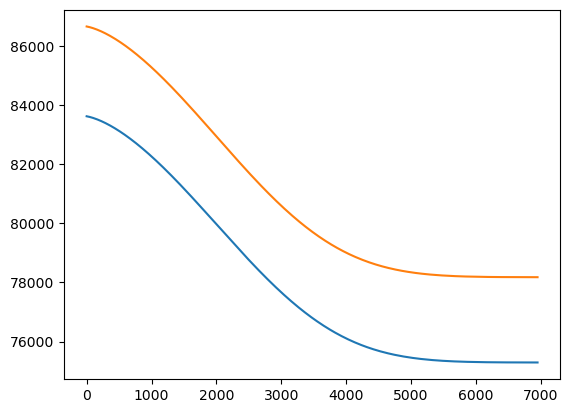

In [20]:
plt.plot(train_loss_l[50:], label='train')
plt.plot(test_loss_l[50:], label='test')

In [29]:
file = open('model', 'rb')
model = pickle.load(file)
file.close()

In [30]:
for i in model.edge_weight:
    print(i)
    

tensor(5.3375e-42, grad_fn=<UnbindBackward0>)
tensor(2.3570e-41, grad_fn=<UnbindBackward0>)
tensor(3.4538e-41, grad_fn=<UnbindBackward0>)
tensor(3.1756e-41, grad_fn=<UnbindBackward0>)
tensor(2.6329e-41, grad_fn=<UnbindBackward0>)
tensor(3.5124e-41, grad_fn=<UnbindBackward0>)
tensor(2.5223e-42, grad_fn=<UnbindBackward0>)
tensor(5.0503e-42, grad_fn=<UnbindBackward0>)
tensor(2.9003e-41, grad_fn=<UnbindBackward0>)
tensor(1.1210e-41, grad_fn=<UnbindBackward0>)
tensor(2.3121e-42, grad_fn=<UnbindBackward0>)
tensor(3.4989e-41, grad_fn=<UnbindBackward0>)
tensor(4.0468e-41, grad_fn=<UnbindBackward0>)
tensor(3.0114e-41, grad_fn=<UnbindBackward0>)
tensor(1.1691e-41, grad_fn=<UnbindBackward0>)
tensor(6.2526e-42, grad_fn=<UnbindBackward0>)
tensor(9.3733e-42, grad_fn=<UnbindBackward0>)
tensor(3.4958e-41, grad_fn=<UnbindBackward0>)
tensor(9.7909e-42, grad_fn=<UnbindBackward0>)
tensor(6.6183e-42, grad_fn=<UnbindBackward0>)
tensor(3.2838e-41, grad_fn=<UnbindBackward0>)
tensor(2.8232e-41, grad_fn=<Unbind

In [42]:
len(model.edge_weight)

1482

In [21]:
model.edge_weight

Parameter containing:
tensor([1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
        1.9519e-41], requires_grad=True)

In [22]:
x = model.edge_weight
m = torch.zeros((39, 39))

tril_indices = torch.tril_indices(row=39, col=39, offset=-1)
triu_indices = torch.triu_indices(row=39, col=39, offset=1)
m[triu_indices[0], triu_indices[1]] = x[:741]
m[tril_indices[0], tril_indices[1]] = x[741:]

In [51]:
len(x[741:])

741

In [23]:
m

tensor([[0.0000e+00, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
         1.9519e-41],
        [1.9519e-41, 0.0000e+00, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
         1.9519e-41],
        [1.9519e-41, 1.9519e-41, 0.0000e+00,  ..., 1.9519e-41, 1.9519e-41,
         1.9519e-41],
        ...,
        [1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 0.0000e+00, 1.9519e-41,
         1.9519e-41],
        [1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 0.0000e+00,
         1.9519e-41],
        [1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
         0.0000e+00]], grad_fn=<IndexPutBackward0>)

In [59]:
m1 = m.clone()
m1[m1.abs()<=1e-4] = 0
m1 

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4073, 0.0000, 0.5439,  ..., 0.5488, 0.5494, 0.5484],
        [0.3927, 0.3941, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.9420, 0.9399, 0.9387,  ..., 0.0000, 0.4168, 0.3906],
        [0.1002, 0.0000, 0.0000,  ..., 0.0424, 0.0000, 0.4158],
        [0.4277, 0.4405, 0.4262,  ..., 0.4413, 0.4366, 0.0000]],
       grad_fn=<IndexPutBackward0>)

In [24]:
import pandas as pd

t_np = m.detach().numpy() #convert to Numpy array
df = pd.DataFrame(t_np) #convert to a dataframe
df.to_csv("new_edge_weights.csv",index=False) #save to file

: 

In [26]:
file = open('model', 'wb')
pickle.dump(model, file)
file.close()

NameError: name 'pd' is not defined